In [5]:
import numpy as np
import grid2op
from grid2op.PlotGrid import PlotMatplot
from lightsim2grid import LightSimBackend
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import copy
import pandas as pd
import plotly.express as px 
# import plotly.graph_objs as go

from l2rpn_baselines.DuelQSimple import evaluate
import shutil
from tqdm import tqdm
from grid2op.Runner import Runner
from grid2op.Episode import EpisodeData
from grid2op.Reward import GameplayReward
from grid2op.Parameters import Parameters
from l2rpn_baselines.OptimCVXPY import OptimCVXPY

# Preprocessing

In [6]:
env = grid2op.make("educ_case14_storage_custom",
                    backend=LightSimBackend(),
                    reward_class = GameplayReward,
                    )
param = env.parameters
param.LIMIT_INFEASIBLE_CURTAILMENT_STORAGE_ACTION = True
env.change_parameters(param)
env.reset()

In [46]:
from run_trained_agents import get_agent

# path_agents = "./saved_model/expe_case_14/expe_hp/"
# path_agents = "./saved_model/expe_case_14/expe_to_run/"
path_agents = "./saved_model/expe_case_14/expe_to_run_tmp/"
# machine_dir = "GymEnvWithRecoDNShuffle14_rewgp_bs2"
# machine_dir = "GymEnvWithRecoDNShuffle14_stor_only"
# machine_dir = "GymEnvWithRecoDNShuffle14_stor_only_bs"
# machine_dir = "case14_stor_only_bs256_50M"
machine_dir = "case14_stor_only_lr_20M"
# machine_dir = "case14_stor_only_lr_20M_d3_20230124_161428_learning_rate_1"
# name = "GymEnvWithRecoDNShuffle14_curt_only_20221122_175837_learning_rate_1"
# name = "GymEnvWithRecoDNShuffle14_L2RPNrew_20221122_181344_learning_rate_3"
# name = "GymEnvWithRecoDNShuffle14_stor_only_20221122_180149_learning_rate_1"
# name = machine_dir + "_20221216_164202_batch_size_0"
# name = machine_dir + "_20230124_161356_learning_rate_1"
name = machine_dir + "_20230124_161312_learning_rate_1"
# name = "GymEnvWithRecoDNShuffle14_rewgp_bs2_20221110_192525_batch_size_2"
# name = "GymEnvWithRecoDNShuffle14_rewgp_bs2_20221111_010528_batch_size_2"
# name = "GymEnvWithRecoDNShuffle14_rewgp_bs2_20221111_064620_batch_size_2"
# name = "GymEnvWithRecoDNShuffle14_rewgp_bs2_20221110_192525_batch_size_4"



training_iter = 20_000_000

root_dir = os.path.abspath(path_agents)
submission_dir  = os.path.join(root_dir, machine_dir)
agent_dir = os.path.join(submission_dir, name)
weights_dir = os.path.join(agent_dir, f"{name}_{training_iter}_steps.zip")

# weights_dir = "/home/boguslawskieva/L2RPN-WCCI-Baselines/RL/saved_model/expe_case_14/expe_to_run/case14_stor_only_lr_20M_d2_20230124_161312_learning_rate_1/case14_stor_only_lr_20M_d2_20230124_161312_learning_rate_1.zip"
# weights_dir = "/home/boguslawskieva/L2RPN-WCCI-Baselines/RL/saved_model/expe_case_14/expe_to_run/case14_stor_only_lr_20M_d1_20230124_161356_learning_rate_1/case14_stor_only_lr_20M_d1_20230124_161356_learning_rate_1.zip"
# weights_dir = "/home/boguslawskieva/L2RPN-WCCI-Baselines/RL/saved_model/expe_case_14/expe_to_run/case14_stor_only_lr_20M_d3_20230124_161428_learning_rate_1/case14_stor_only_lr_20M_d3_20230124_161428_learning_rate_1_15500000_steps.zip"

# weights_dir = "/home/boguslawskieva/L2RPN-WCCI-Baselines/RL/saved_model/expe_case_14/expe_to_run/case14_stor_only_7s_5M_20230127_150418_learning_rate_0/case14_stor_only_7s_5M_20230127_150418_learning_rate_0_2750000_steps.zip"

agent = get_agent( # submission_dir,
                                # agent_dir,
                                weights_dir,
                                env,
                                0.2,
                                -1)


# name = "OptimCVXPY"
# agent = OptimCVXPY(env.action_space,
#                    env,
#                    penalty_redispatching_unsafe=100,
#                    penalty_redispatching_safe=100,
#                    penalty_storage_unsafe=100, # 0.01,
#                    penalty_storage_safe=100, # 0.01,
#                    penalty_curtailment_unsafe=0.001,
#                    penalty_curtailment_safe=0.001, # Not initially there
#                    rho_safe=0.2,
#                    rho_danger=0.8,
#                    margin_th_limit=0.93,
#                    alpha_por_error=0.5,
#                    weight_redisp_target=0.3)

agent

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [25]:
save_path = "./model_results/"
path_save_results = os.path.join(save_path, name)
shutil.rmtree(path_save_results, ignore_errors=True)

In [26]:
NB_EPISODE = len(env.chronics_handler.real_data.available_chronics())
MAX_ITER = env.max_episode_duration()

try:
    all_episodes = EpisodeData.list_episode(path_save_results)
except FileNotFoundError:
    test_runner = Runner(**env.get_params_for_runner(),
                        agentInstance=agent, agentClass=None)
    res = test_runner.run(nb_episode=NB_EPISODE,
                        max_iter=MAX_ITER,
                        pbar=tqdm,
                        path_save=path_save_results
                        )
    all_episodes = EpisodeData.list_episode(path_save_results)

all_episodes


episode: 100%|██████████| 7/7 [00:07<00:00,  1.03s/it]


[('/home/boguslawskieva/L2RPN-WCCI-Baselines/RL/model_results/case14_stor_only_lr_20M_20230124_161312_learning_rate_1',
  '2019-01-12'),
 ('/home/boguslawskieva/L2RPN-WCCI-Baselines/RL/model_results/case14_stor_only_lr_20M_20230124_161312_learning_rate_1',
  '2019-01-13'),
 ('/home/boguslawskieva/L2RPN-WCCI-Baselines/RL/model_results/case14_stor_only_lr_20M_20230124_161312_learning_rate_1',
  '2019-01-14'),
 ('/home/boguslawskieva/L2RPN-WCCI-Baselines/RL/model_results/case14_stor_only_lr_20M_20230124_161312_learning_rate_1',
  '2019-01-15'),
 ('/home/boguslawskieva/L2RPN-WCCI-Baselines/RL/model_results/case14_stor_only_lr_20M_20230124_161312_learning_rate_1',
  '2019-01-16'),
 ('/home/boguslawskieva/L2RPN-WCCI-Baselines/RL/model_results/case14_stor_only_lr_20M_20230124_161312_learning_rate_1',
  '2019-01-17'),
 ('/home/boguslawskieva/L2RPN-WCCI-Baselines/RL/model_results/case14_stor_only_lr_20M_20230124_161312_learning_rate_1',
  '2019-01-18')]

In [45]:
# NB_EPISODE = len(env.chronics_handler.real_data.available_chronics())
# MAX_ITER = env.max_episode_duration()


# test_runner = Runner(**env.get_params_for_runner(),
#                     agentInstance=agent, agentClass=None)
# res = test_runner.run(nb_episode=NB_EPISODE,
#                     max_iter=MAX_ITER,
#                     pbar=tqdm,
#                     )


episode: 288it [00:00, 328.28it/s]00<?, ?it/s]
episode: 288it [00:00, 326.27it/s]01<00:06,  1.15s/it]
episode: 229it [00:00, 327.37it/s]02<00:05,  1.17s/it]
episode: 288it [00:01, 273.48it/s]03<00:04,  1.08s/it]
episode: 234it [00:00, 326.13it/s]04<00:03,  1.17s/it]
episode: 288it [00:00, 350.25it/s]05<00:02,  1.11s/it]
episode: 288it [00:00, 331.50it/s]06<00:01,  1.11s/it]
episode: 100%|██████████| 7/7 [00:07<00:00,  1.13s/it]


Résultats DN : 288, 288, 220, 90, 236, 234, 86

# Study actions

In [27]:
episode_list = [EpisodeData.from_disk(*all_episodes[i]) for i in range(7)]
episode_act_array = [np.array([[*act._storage_power, *act._curtail[2:5]] for act in this_episode.actions]) for this_episode in episode_list]

In [14]:
plt.figure(figsize=(15, 6))
for i in range(7):
    plt.subplot(2,4,i+1)
    sns.heatmap(episode_act_array[i], vmin=-1, vmax=1)
    plt.title(f"scenario_{i}")
plt.show()

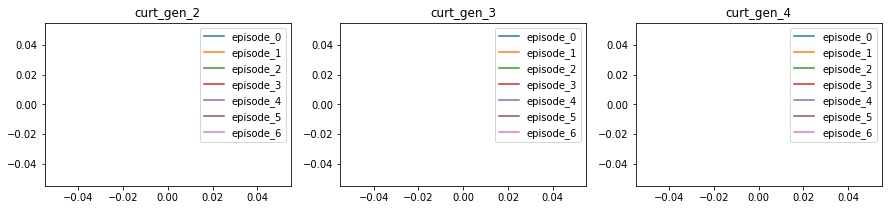

In [28]:
label = ["storage_0", "storage_1", "curt_gen_2", "curt_gen_3", "curt_gen_4"]
plt.figure(figsize=(15,3))
for i in range(2,5):
    plt.subplot(1,3,i-1)
    for j in range(7):
        y = copy.deepcopy(episode_act_array[j][:,i])
        y[y==-1] = np.nan
        plt.plot(y, label = f"episode_{j}")
    plt.title(label[i])
    plt.legend()
plt.show()

label = ["storage_0", "storage_1", "curt_gen_2", "curt_gen_3", "curt_gen_4"]
plt.figure(figsize=(15,6))
for j in range(7):
    plt.subplot(2,4,j+1)
    for i in range(2,5):
        y = copy.deepcopy(episode_act_array[j][:,i])
        y[y==-1] = np.nan
        plt.plot(y, label = label[i])
    plt.title(f"episode_{j}")
    plt.legend()
plt.show()


In [29]:
label = ["storage_0", "storage_1", "curt_gen_2", "curt_gen_3", "curt_gen_4"]
data = pd.concat([pd.DataFrame(episode, columns=label).assign(scenario_id = i).reset_index() for i, episode in enumerate(episode_act_array)], axis="index", ignore_index=True) \
    .astype({'scenario_id': 'str'}) \
    .rename(columns={"index":"timestep"})
data[data==-1] = np.nan

data_melt = pd.melt(data, id_vars=['timestep', 'scenario_id'], value_vars=["storage_0", "storage_1", "curt_gen_2", "curt_gen_3", "curt_gen_4"], 
            var_name ="action_name", value_name="action_value")
data_melt.head(5)

timestep scenario_id action_name  action_value
0         0           0   storage_0          -5.0
1         1           0   storage_0          -5.0
2         2           0   storage_0          -5.0
3         3           0   storage_0          -5.0
4         4           0   storage_0          -5.0

In [30]:
g = sns.relplot(data=data_melt, x = "timestep", y = "action_value", hue="scenario_id", col="action_name", drawstyle='steps-post',
        kind="line", col_wrap=3, facet_kws={'sharey': False}, height=2.8, aspect=1.5) \
        .fig.suptitle('Actions en fonction du scénario', y=1.05)

g = sns.relplot(data=data_melt, x = "timestep", y = "action_value", hue="action_name", col="scenario_id", drawstyle='steps-post',
    kind="line", col_wrap=4, facet_kws={'sharey': False}, height=2.8, aspect=1.5) \
    .fig.suptitle('Actions en fonction du scénario', y=1.05)

# Study observations

In [31]:
episode_list = [EpisodeData.from_disk(*all_episodes[i]) for i in range(7)]

In [39]:
df_storage = pd.concat([pd.DataFrame({"scenario_id":j, "timestep":i, "storage_id":np.arange(obs.n_storage), 
                                "storage_charge":obs.storage_charge, "storage_power":obs.storage_power,
                                "storage_power_target":obs.storage_power_target}) 
                    for j in range(len(episode_list))
                    for i, obs in enumerate(episode_list[j].observations)],
                    ignore_index=True) \
                .astype({'scenario_id': 'str', 'storage_id':'str'})

df_storage.head(5)

scenario_id  timestep storage_id  storage_charge  storage_power  \
0           0         0          0        7.500000            0.0   
1           0         0          1        3.500000            0.0   
2           0         1          0        7.075000           -5.0   
3           0         1          1        4.325000           10.0   
4           0         2          0        6.650001           -5.0   

   storage_power_target  
0                   0.0  
1                   0.0  
2                  -5.0  
3                  10.0  
4                  -5.0

In [40]:
df_storage = df_storage[df_storage["scenario_id"]=="6"]
g = px.line(df_storage, x = "timestep", y = ["storage_power", "storage_power_target"], facet_row="scenario_id", 
    facet_col="storage_id", height=1000
    )
g.add_hline(y=0, line_width=2, line_dash="dash", line_color="grey")
g.show()

In [25]:
env.action_space.storage_max_p_absorb, env.action_space.storage_max_p_prod

(array([ 5., 10.], dtype=float32), array([ 5., 10.], dtype=float32))

In [36]:
df_storage.timestep.max()

288

In [34]:
df = df_storage.copy()
df_temp = df.groupby(["scenario_id"])[["timestep"]].agg("max").reset_index().rename({"timestep":"ts_survived"}, axis=1)
df = pd.merge(df, df_temp, how='left', on=['scenario_id'])
df = df[df.timestep != df.ts_survived]
df


scenario_id  timestep storage_id  storage_charge  storage_power  \
0             6         0          0        7.500000       0.000000   
1             6         0          1        3.500000       0.000000   
2             6         1          0        7.075000      -5.000000   
3             6         1          1        4.325000      10.000000   
4             6         2          0        6.750534      -3.793595   
..          ...       ...        ...             ...            ...   
461           6       230          1        0.000000      -4.673832   
462           6       231          0       14.991667       0.105266   
463           6       231          1        0.000000       0.000000   
464           6       232          0       14.991667       0.105266   
465           6       232          1        0.000000       0.000000   

     storage_power_target  ts_survived  
0                0.000000          233  
1                0.000000          233  
2               -5.000000          233  
3               10.000000          233  
4               -3.793595          233  
..                    ...          ...  
461            -10.000000          233  
462              5.000000          233  
463            -10.000000          233  
464              5.000000          233  
465            -10.000000          233  

[466 rows x 7 columns]

In [35]:
df = df_storage.copy()
df_temp = df.groupby(["scenario_id"])[["timestep"]].agg("max").reset_index().rename({"timestep":"ts_survived"}, axis=1)
df = pd.merge(df, df_temp, how='left', on=['scenario_id'])
df = df[df.timestep != df.ts_survived]

g = px.line(df, x = "timestep", y = "storage_charge", facet_col="scenario_id", 
    color="storage_id", facet_col_wrap=4
    )
g.add_hline(y=0, line_width=2, line_dash="dash", line_color="grey")
g.show()

In [23]:
df_gen = pd.concat([pd.DataFrame({"scenario_id":j, "timestep":i, "gen_id":np.arange(obs.n_gen), 
                                "is_renewable":env.gen_renewable, "gen_p":obs.gen_p, "curtailment_mw":obs.curtailment_mw, 
                                "curtailment": obs.curtailment, "gen_p_before_curtail": obs.gen_p_before_curtail,
                                "curtailment_limit_mw": obs.curtailment_limit * obs.gen_pmax}) 
                    for j in range(len(episode_list))
                    for i, obs in enumerate(episode_list[j].observations)],
                    ignore_index=True) \
                .astype({'scenario_id': 'str', 'gen_id':'str'})

df_temp = df_gen.groupby(["scenario_id", "timestep"]).agg("sum").reset_index() \
                .assign(is_renewable = None, gen_id = "total")

df_gen = pd.concat([df_gen, df_temp], ignore_index=True)
df_gen.head(5)

scenario_id  timestep gen_id is_renewable      gen_p  curtailment_mw  \
0           0         0      0        False  83.400002             0.0   
1           0         0      1        False  81.900002             0.0   
2           0         0      2         True  17.299999             0.0   
3           0         0      3         True   0.000000             0.0   
4           0         0      4         True   0.000000             0.0   

   curtailment  gen_p_before_curtail  curtailment_limit_mw  
0          0.0              0.000000                 140.0  
1          0.0              0.000000                 120.0  
2          0.0             17.299999                  70.0  
3          0.0              0.000000                  70.0  
4          0.0              0.000000                  40.0

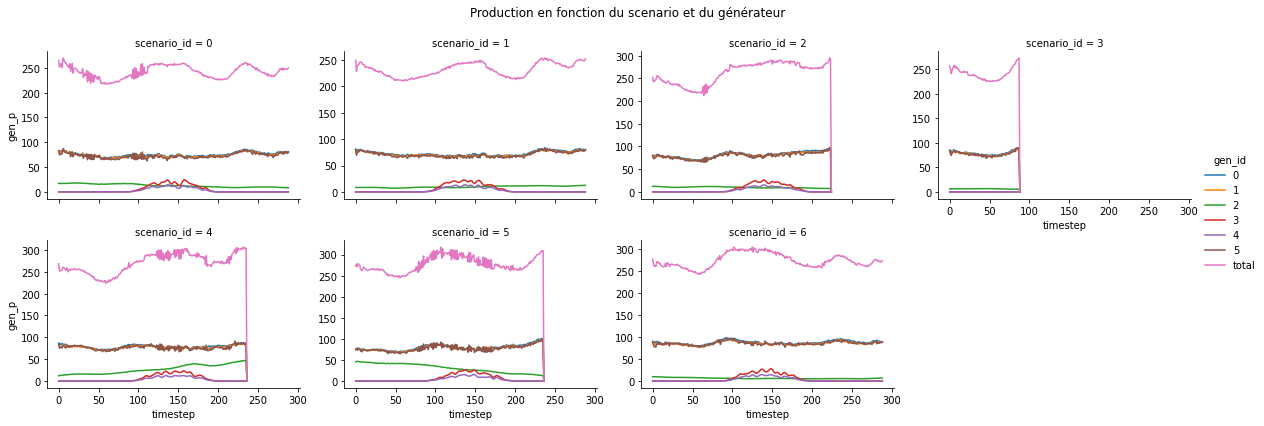

In [24]:
g = sns.relplot(data=df_gen, x = "timestep", y = "gen_p", hue="gen_id", col="scenario_id",
        kind="line", col_wrap=4, facet_kws={'sharey': False}, height=2.8, aspect=1.5) \
        .fig.suptitle('Production en fonction du scenario et du générateur', y=1.05)

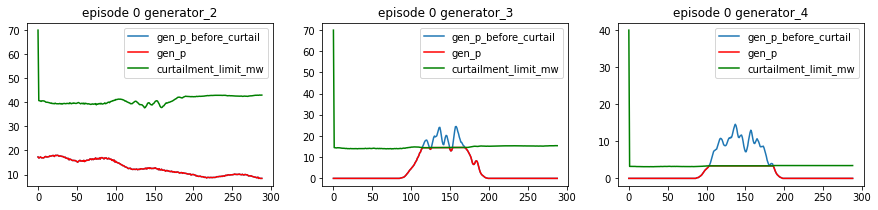

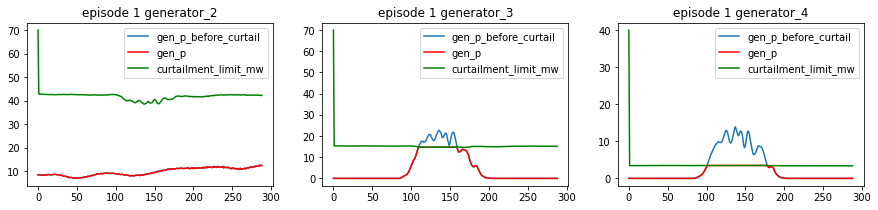

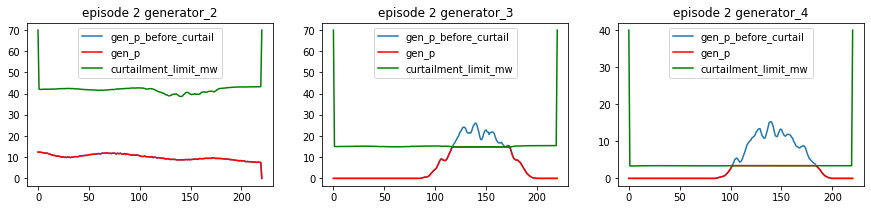

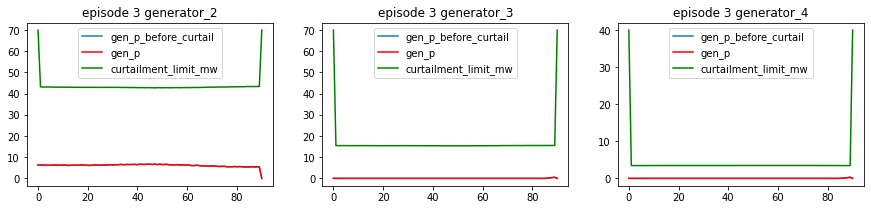

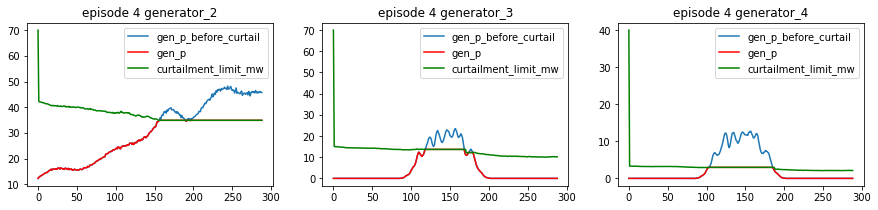

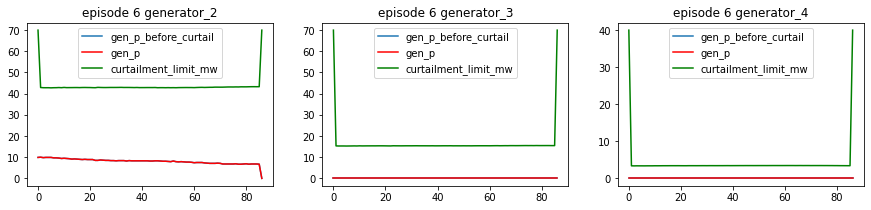

In [23]:
for episode_id in range(7):
    plt.figure(figsize=(15,3))
    for id_gen in range(2,5):
        plt.subplot(1,3,id_gen-1)
        df = df_gen[np.logical_and(df_gen["scenario_id"]==str(episode_id), df_gen["gen_id"]==str(id_gen))].reset_index()
        plt.plot(df["gen_p_before_curtail"], label = "gen_p_before_curtail")
        plt.plot(df['gen_p'], color="red", label = "gen_p")
        plt.plot(df['curtailment_limit_mw'], color="green", label = "curtailment_limit_mw")
        plt.title(f'episode {episode_id} generator_{id_gen}')
        plt.legend()
    plt.show()

## Production by generators by scenario

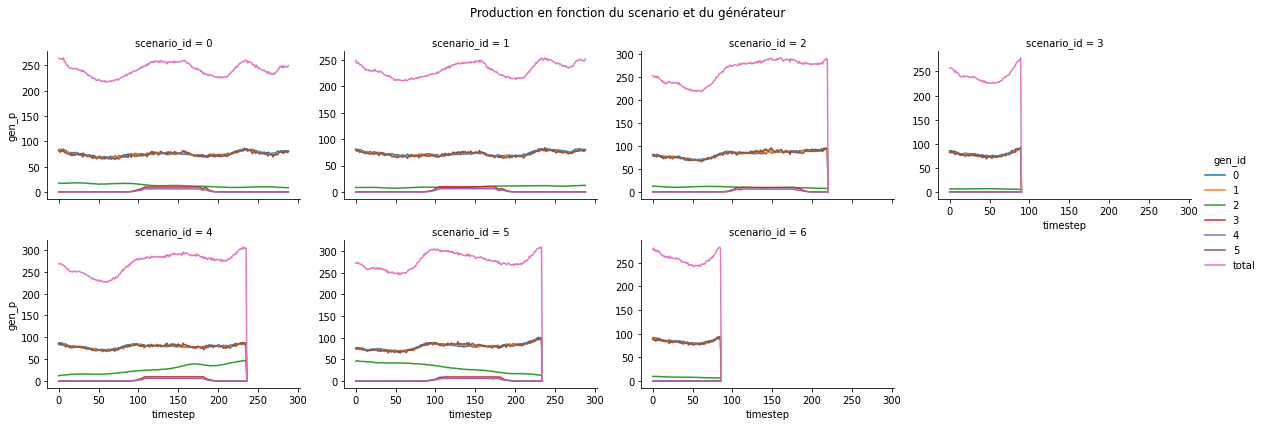

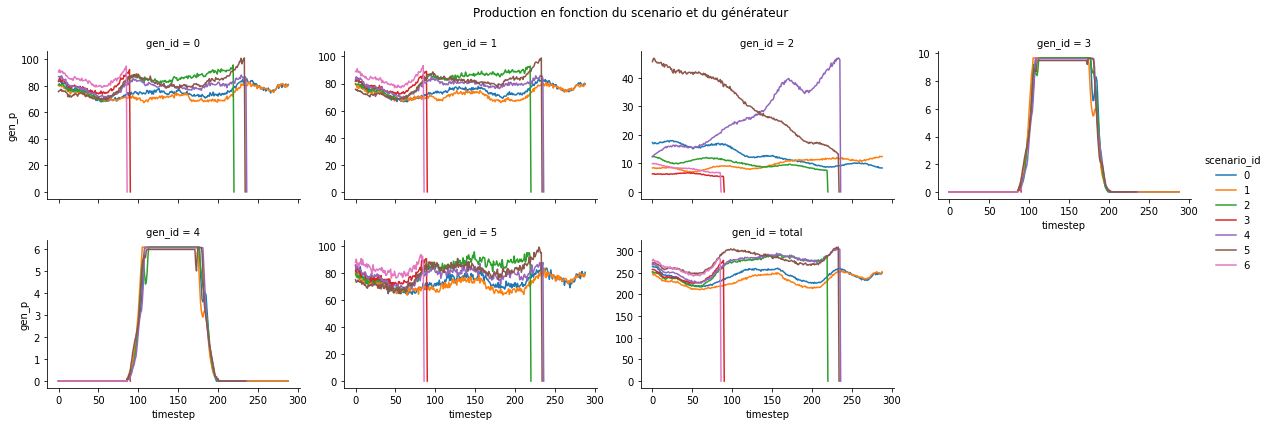

In [15]:
g = sns.relplot(data=df_gen, x = "timestep", y = "gen_p", hue="gen_id", col="scenario_id",
        kind="line", col_wrap=4, facet_kws={'sharey': False}, height=2.8, aspect=1.5) \
        .fig.suptitle('Production en fonction du scenario et du générateur', y=1.05)

g = sns.relplot(data=df_gen, x = "timestep", y = "gen_p", hue="scenario_id", col="gen_id",
        kind="line", col_wrap=4, facet_kws={'sharey': False}, height=2.8, aspect=1.5) \
        .fig.suptitle('Production en fonction du scenario et du générateur', y=1.05)

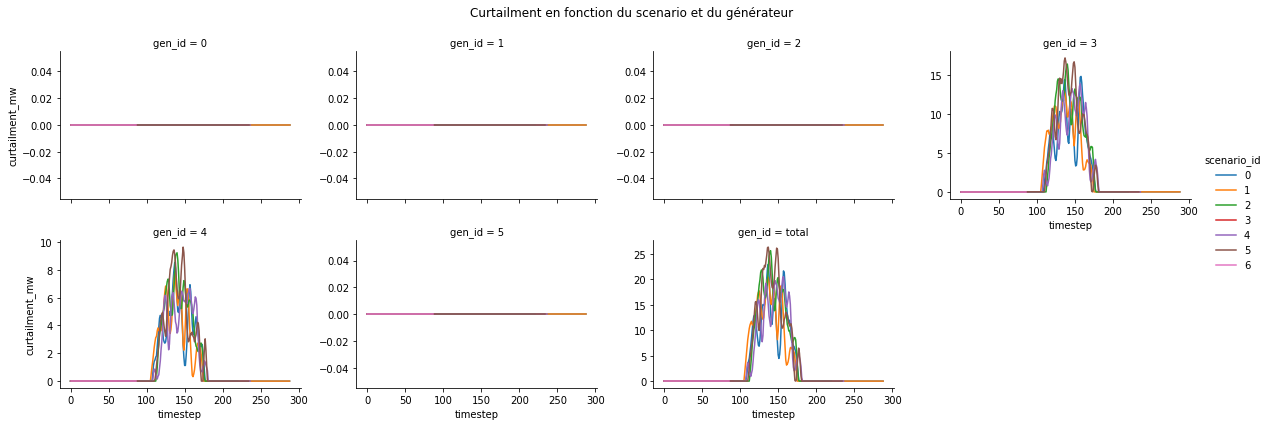

In [16]:
g = sns.relplot(data=df_gen, x = "timestep", y = "curtailment_mw", hue="gen_id", col="scenario_id",
        kind="line", col_wrap=4, facet_kws={'sharey': False}, height=2.8, aspect=1.5) \
        .fig.suptitle('Curtailment en fonction du scenario et du générateur', y=1.05)

g = sns.relplot(data=df_gen, x = "timestep", y = "curtailment_mw", hue="scenario_id", col="gen_id",
        kind="line", col_wrap=4, facet_kws={'sharey': False}, height=2.8, aspect=1.5) \
        .fig.suptitle('Curtailment en fonction du scenario et du générateur', y=1.05)

In [150]:
g = px.line(df_gen, x = "timestep", y = "curtailment_mw", facet_col="scenario_id", color="gen_id",
    facet_col_wrap=4, title="Curtailment mw par scénario par gen")
# g.add_hline(y=1, line_width=2, line_dash="dash", line_color="grey")
g.show()

In [151]:
g = px.line(df_gen, x = "timestep", y = "curtailment", facet_col="scenario_id", color="gen_id",
    facet_col_wrap=4, title="Curtailment par scénario par gen")
# g.add_hline(y=1, line_width=2, line_dash="dash", line_color="grey")
g.show()

In [77]:
env.gen_type

array(['nuclear', 'thermal', 'wind', 'solar', 'solar', 'hydro'],
      dtype='<U10')

## Consumption by scenario by load

In [25]:
df_load = pd.concat([pd.DataFrame({"scenario_id":j, "timestep":i, "load_id":np.arange(obs.n_load), "load_p":obs.load_p}) 
                    for j in range(len(episode_list))
                    for i, obs in enumerate(episode_list[j].observations)],
                    ignore_index=True) \
                .astype({'scenario_id': 'str', 'load_id':'str'})

df_temp = df_load.groupby(["scenario_id", "timestep"]).agg("sum").reset_index() \
                .assign(load_id = "total")

df_load = pd.concat([df_load, df_temp], ignore_index=True)
df_load.head(5)

scenario_id  timestep load_id     load_p
0           0         0       0  22.000000
1           0         0       1  90.599998
2           0         0       2  50.700001
3           0         0       3   7.600000
4           0         0       4  11.400000

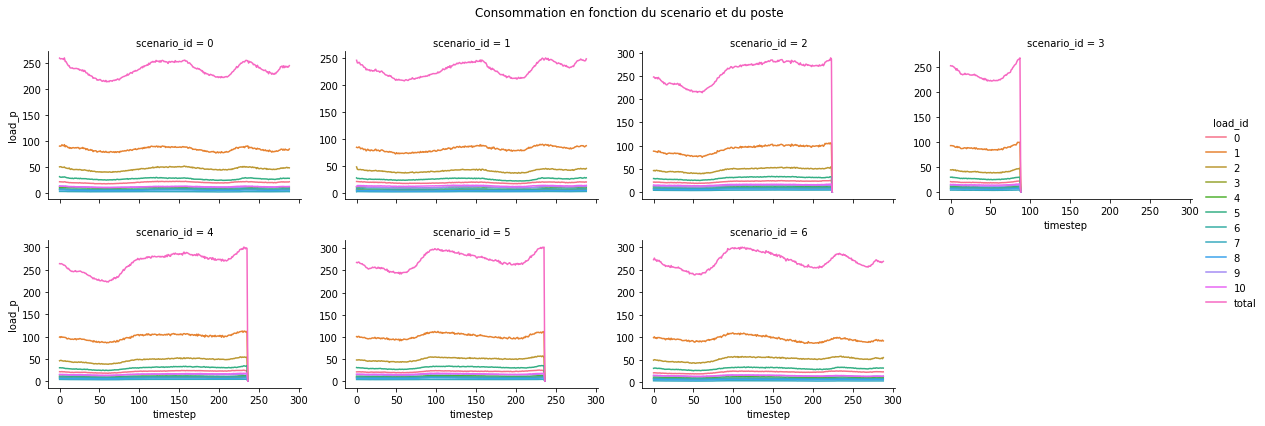

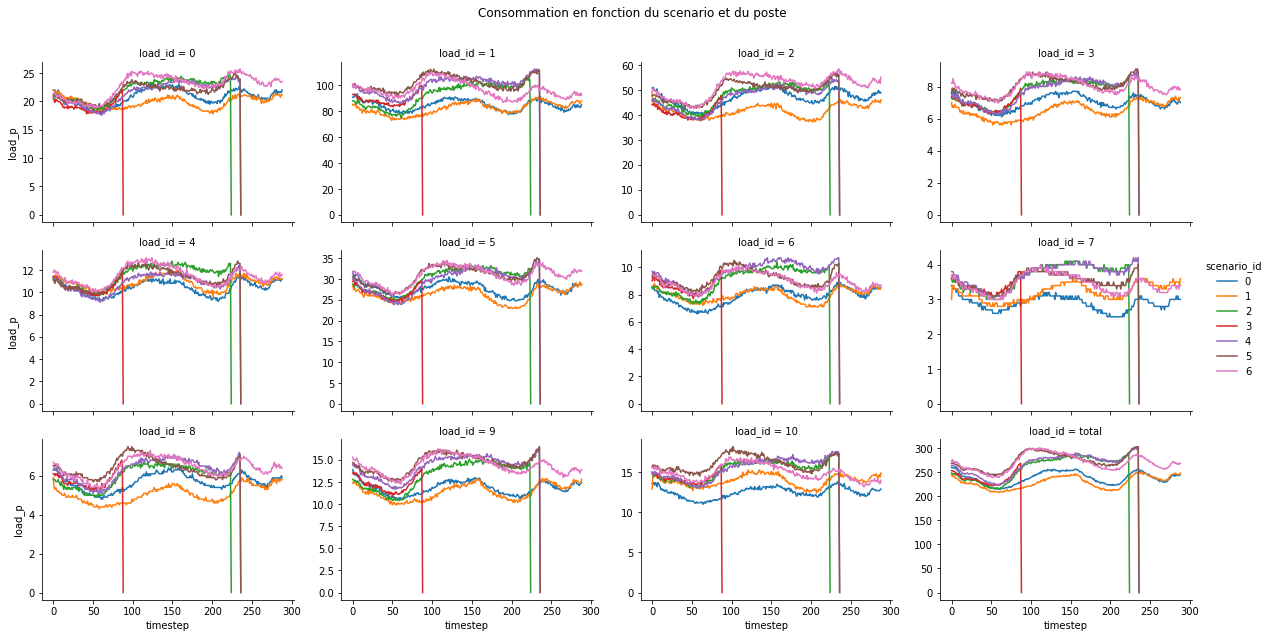

In [26]:
g = sns.relplot(data=df_load, x = "timestep", y = "load_p", hue="load_id", col="scenario_id",
        kind="line", col_wrap=4, facet_kws={'sharey': False}, height=2.8, aspect=1.5) \
        .fig.suptitle('Consommation en fonction du scenario et du poste', y=1.05)

g = sns.relplot(data=df_load, x = "timestep", y = "load_p", hue="scenario_id", col="load_id",
        kind="line", col_wrap=4, facet_kws={'sharey': False}, height=2.8, aspect=1.5) \
        .fig.suptitle('Consommation en fonction du scenario et du poste', y=1.05)

## Capacity by line by scenario

In [27]:
df_line = pd.concat([pd.DataFrame({"scenario_id":j, "timestep":i, "line_id":np.arange(obs.n_line), "rho":obs.rho}) 
                    for j in range(len(episode_list))
                    for i, obs in enumerate(episode_list[j].observations)],
                    ignore_index=True) \
                .astype({'scenario_id': 'str', 'line_id':'str'})
df_line.head(5)

scenario_id  timestep line_id       rho
0           0         0       0  0.338955
1           0         0       1  0.356180
2           0         0       2  0.288605
3           0         0       3  0.271821
4           0         0       4  0.817844

In [28]:
g = px.line(df_line, x = "timestep", y = "rho", facet_col="scenario_id", color="line_id",
    facet_col_wrap=4, title="Capacité des lignes par scénario")
g.add_hline(y=1, line_width=2, line_dash="dash", line_color="grey")
g.show()

# Why is there -1 for curtailment and 0 for batteries ?

In [42]:
this_episode = EpisodeData.from_disk(*all_episodes[0])

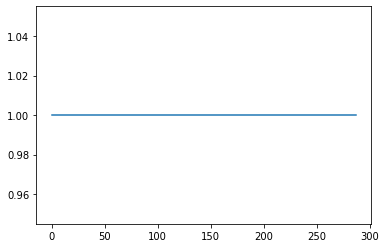

In [214]:
plt.plot(this_episode.rewards)

In [49]:
obs = this_episode.observations[150]
rew = this_episode.rewards[150]
done = False
act = agent.act(obs, rew, done)
act._storage_power, act._curtail

(array([0., 0.], dtype=float32),
 array([-1.        , -1.        ,  0.57751083,  0.20832126, -1.        ,
        -1.        ], dtype=float32))

In [44]:
obs = this_episode.observations[151]
obs.curtailment, obs.curtailment_limit, obs.curtailment_limit_effective, obs.storage_power

(array([0.     , 0.     , 0.     , 0.     , 0.09546, 0.     ],
       dtype=float32),
 array([1.        , 1.        , 0.57751083, 0.20832126, 0.08453999,
        1.        ], dtype=float32),
 array([1.        , 1.        , 0.57751083, 0.20832126, 0.08453999,
        1.        ], dtype=float32),
 array([0., 0.], dtype=float32))

In [56]:
act = agent.l2rpn_agent.act(obs, rew, done)
print(act._storage_power, act._curtail)
act, _ , _ =act.limit_curtail_storage(obs, margin=20)
act._storage_power, act._curtail

[-1.0025344 -1.7251899] [-1.         -1.          0.57751083  0.20832126  0.0833865  -1.        ]


(array([-1.0025344, -1.7251899], dtype=float32),
 array([-1.        , -1.        ,  0.57751083,  0.20832126,  0.0833865 ,
        -1.        ], dtype=float32))

In [53]:


gym_obs = agent.l2rpn_agent._gym_obs_space.to_gym(obs)
gym_act = agent.l2rpn_agent.get_act(gym_obs, rew, done)
print(gym_act)
act = agent.l2rpn_agent._gym_act_space.from_gym(gym_act)
print(act._storage_power, act._curtail)
# fix the action if needed (for example by limiting curtailment and storage)
act = agent.l2rpn_agent.gymenv.fix_action(act)
act._storage_power, act._curtail

[ 0.57751083  0.20832126  0.0833865  -0.20050688 -0.172519  ]
[-1.0025344 -1.7251899] [-1.         -1.          0.57751083  0.20832126  0.0833865  -1.        ]


(array([-1.0025344, -1.7251899], dtype=float32),
 array([-1.        , -1.        ,  0.57751083,  0.20832126,  0.0833865 ,
        -1.        ], dtype=float32))

In [60]:
obs.time_before_cooldown_line

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

# Test ipywidget

In [44]:
import ipywidgets as widgets

plot_helper = PlotMatplot(env.observation_space)

style = {'description_width': 'initial'}

timestep_case = widgets.IntText(
            value=0,
            description="Timestep number", 
            continuous_update=False,
            disabled=False
            )

scenario_case = widgets.IntSlider(
    value=0,
    min=0,
    max=6,
    step=1,
    description='Scenario number',
    disabled=False,
    style=style,
    behavior="snap", # 'drag-tap', 'drag-snap', 'tap', 'drag', 'snap'
)

In [121]:
def update_df_length(t, scenario_id):
    this_episode = episode_list[int(scenario_id)]
    max_timestep = len(this_episode.observations)
    if t <= max_timestep:
        obs = this_episode.observations[t]
        print(f"Scenario id: {scenario_id}. Observation number: {t}. Date and time: {obs.day}/{obs.month}/{obs.year} {obs.hour_of_day}:{obs.minute_of_hour}")
        _ = plot_helper.plot_info(line_values=obs.rho, coloring="line", gen_values=obs.gen_p, storage_values=obs.storage_power, load_values=obs.load_p)
        plt.show()
        print("Current curtailment limits:", obs.curtailment_limit[2:5])
        print("Current effective curtailment limits:", obs.curtailment_limit_effective[2:5])
        print("Current curtailment limits mw:", obs.curtailment_limit_mw[2:5])
        print("Current curtailment:", obs.curtailment[2:5], "Current curtailment mw:", obs.curtailment_mw[2:5])
        print("gen_p_before_curtailment:", obs.gen_p_before_curtail[2:5])
        if t < max_timestep:
            print("Future action:")
            print(this_episode.actions[t])
        else:
            print("This is the final timestep.")
    else:
        print(f"The episode ended at timestep {max_timestep}. There is no observation number {t}.")

In [122]:
widgets.interactive(update_df_length, t=timestep_case, scenario_id = scenario_case)

interactive(children=(IntText(value=218, description='Timestep number'), IntSlider(value=2, behavior='snap', d…